# Course project: Machine Learning (Data Science- PGC)
   *outline : Random forest as best model with Highest R2 score and least MSE
 

# Importing Data and Libraries 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [21]:
df= pd.read_csv('C:/Users/91841/Downloads/MLcaseStudy.csv', header=0)
College= pd.read_csv('C:/Users/91841/Downloads/colleges.csv', header=0) 
City= pd.read_csv('C:/Users/91841/Downloads/cities.csv', header=0)

In [22]:
Tier1=College["Tier 1"].tolist()             #Creating list 
Tier2=College["Tier 2"].tolist()
Tier3=College["Tier 3"].tolist()

In [23]:
for item in df.College:                     #replacing college name
    if item in Tier1:
        df["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace=True)

In [24]:
non_metro_cities = City["non-metro cities"].tolist()
metro_cities = City["Metrio City"].tolist()

In [25]:
for item in df["City"]:                      #replacing values in "City" column of a DataFrame df 
    if item in metro_cities:
        df["City"].replace(item, "Metro", inplace=True)
    elif item in non_metro_cities:
        df["City"].replace(item, "NonMetro", inplace=True)

# Data Preprocessing

Creating dummy

In [26]:
# for role column using get dummies

df = pd.get_dummies(df, columns=["Role"], drop_first=True)

In [27]:
#for city column Maping the "City" column using the dictionary

city_mapping = {'NonMetro': 0, 'Metro': 1}                
df['City'] = df['City'].map(city_mapping)

In [28]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [29]:
df.shape

(1589, 8)

In [30]:
duplicate_sum = df.duplicated().sum()
print("Sum of Duplicate Variables:", duplicate_sum)

Sum of Duplicate Variables: 46


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(1543, 8)

EDD Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1543 non-null   int64  
 1   City                 1543 non-null   int64  
 2   Previous CTC         1543 non-null   float64
 3   Previous job change  1543 non-null   int64  
 4   Graduation Marks     1543 non-null   int64  
 5   EXP (Month)          1543 non-null   int64  
 6   CTC                  1543 non-null   float64
 7   Role_Manager         1543 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 97.9 KB


In [34]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,1.977317,0.511342,55545.792612,2.530136,59.900843,39.174984,75393.887628,0.207388
std,0.835421,0.500033,6677.101810,1.123487,14.926535,14.056555,12585.690921,0.405567
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50537.000000,2.000000,47.000000,27.000000,66939.040000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60124.500000,4.000000,73.000000,51.000000,80601.825000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [35]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014132,0.041470,-0.059729,0.004344,0.009064,-0.026282,-0.012903
City,-0.014132,1.000000,0.000010,0.058553,-0.014316,-0.020581,-0.013014,-0.043584
Previous CTC,0.041470,0.000010,1.000000,0.010004,-0.027740,0.121437,0.262554,0.016814
Previous job change,-0.059729,0.058553,0.010004,1.000000,0.020345,0.022416,0.005110,-0.025111
Graduation Marks,0.004344,-0.014316,-0.027740,0.020345,1.000000,-0.054128,-0.004035,0.021289
EXP (Month),0.009064,-0.020581,0.121437,0.022416,-0.054128,1.000000,0.295916,-0.026618
CTC,-0.026282,-0.013014,0.262554,0.005110,-0.004035,0.295916,1.000000,0.623223
Role_Manager,-0.012903,-0.043584,0.016814,-0.025111,0.021289,-0.026618,0.623223,1.000000


<Axes: >

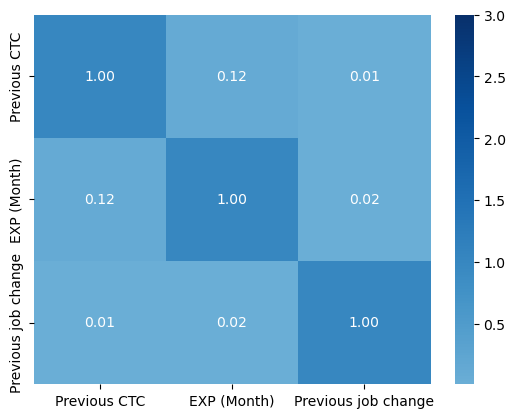

In [36]:
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Previous CTC', 'EXP (Month)', 'Previous job change']].corr(), vmax=3, center=0, cmap='Blues', annot=True, fmt=".2f")

CTC has significant positive correlation with Role 0.6, Experience(Month)=0.29, then Previous CTC=0.26
THE HEATMAP clearly explains hoe the features are closely related and impacting target variable CTC

Checking for outliers with scatter plot

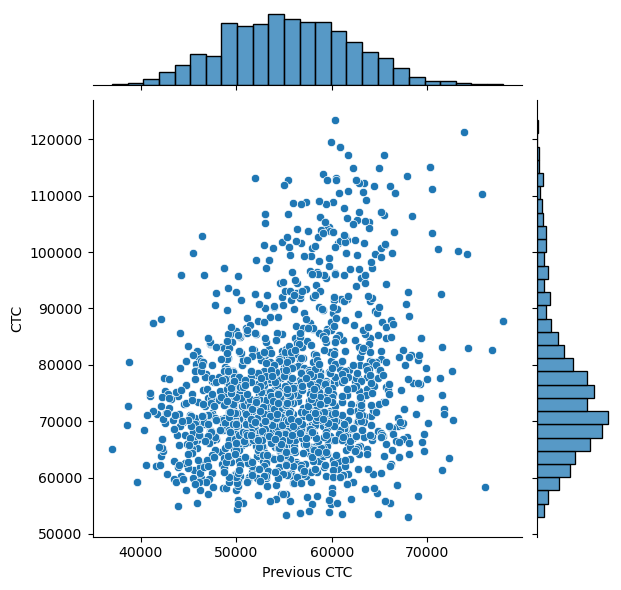

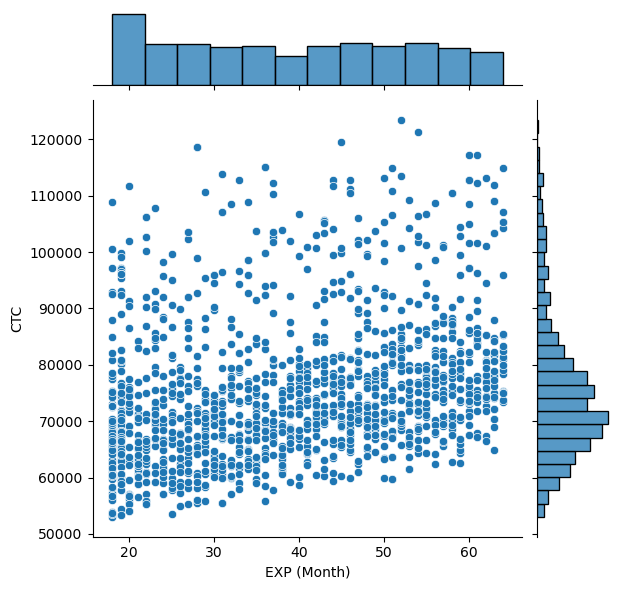

In [37]:
sns.jointplot(x='Previous CTC',y='CTC', data=df) 
sns.jointplot(x='EXP (Month)',y='CTC', data=df)

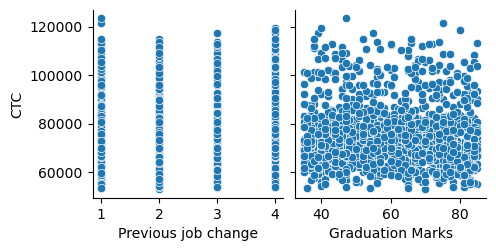

In [38]:
import matplotlib.pyplot as plt

x_vars = ['Previous job change', 'Graduation Marks']
y_var = 'CTC'

# Create the scatter plot using pairplot
sns.pairplot(df, x_vars=x_vars, y_vars=y_var, kind='scatter')
plt.show()


<Axes: xlabel='City', ylabel='count'>

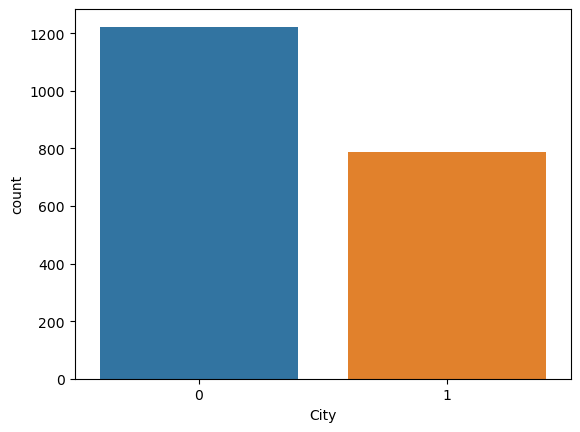

In [39]:
sns.countplot(x="College", data=df)
sns.countplot(x="Role_Manager", data=df)
sns.countplot(x="City", data=df)

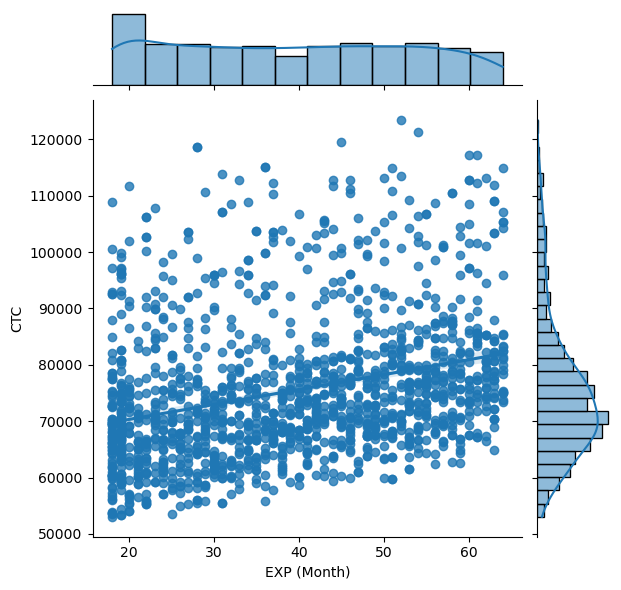

In [40]:
sns.jointplot(x='EXP (Month)', y='CTC', data=df, kind='reg')

# Split data set into x and y

In [41]:
#dividing data into x and y variables, x contains all the feature , 
# y is dependent target variable

x=df.loc[:,df.columns!="CTC"]
y=df["CTC"]

In [42]:
x.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [43]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

# Test train Split

In [44]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# STANDAR SCALING

In [45]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)

# Transforming the training data using the fitted scaler
x_train_scaled = scaler.transform(x_train)

# Transforming the test data using the fitted scaler
x_test_scaled = scaler.transform(x_test)


# TRAING DIFFRENT MODELS TO FIND THE BEST ONE

# MODEL 1. LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Creating Linear Regression model object 

linear_reg = LinearRegression()

# Fiting the model to the training data
linear_reg.fit(x_train, y_train)

# Predicting on the training data
y_pred_train = linear_reg.predict(x_train)

# Predict on the testing data
y_pred_test = linear_reg.predict(x_test)

# Calculate R-squared score for linear regression

r2_linear = r2_score(y_test, y_pred_test)
mse_linear = mean_squared_error(y_test, y_pred_test)
print("Linear Regression - R-squared Score:", r2_linear)
print("Linear Regression - Mean Squared Error:", mse_linear)

# Creating object for the Gradient Boosting Regressor
boost_reg = GradientBoostingRegressor()

# Fiting the model to the training data
boost_reg.fit(x_train, y_train)

# Predicting on the training data
y_pred_train_boost = boost_reg.predict(x_train)

# Predicting on the test data
y_pred_test_boost = boost_reg.predict(x_test)

# Calculating R-squared score for boosting

r2_boost = r2_score(y_test, y_pred_test_boost)
mse_boost = mean_squared_error(y_test, y_pred_test_boost)
print("Boosting - R-squared Score:", r2_boost)
print("Boosting - Mean Squared Error:", mse_boost)


Linear Regression - R-squared Score: 0.5325543474367493
Linear Regression - Mean Squared Error: 79775085.52539693
Boosting - R-squared Score: 0.6105690367750416
Boosting - Mean Squared Error: 66460963.380775206


# Model 2 Decision Tree

In [47]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor

# Creating Decision Tree Regressor model object 

regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(x_train, y_train)

# Predict on the test data using the decision tree model
y_pred = regtree.predict(x_test)

# Calculate R-squared score and mean squared error for the decision tree model

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree - R-squared Score:", r2)
print("Decision Tree - Mean Squared Error:", mse)

# Create an instance of the Gradient Boosting Regressor
boost_reg = GradientBoostingRegressor()

boost_reg.fit(x_train, y_train)

y_pred_boost = boost_reg.predict(x_test)

# Calculate R-squared score and mean squared error for the boosting model
r2_boost = r2_score(y_test, y_pred_boost)
mse_boost = mean_squared_error(y_test, y_pred_boost)
print("Boosting - R-squared Score:", r2_boost)
print("Boosting - Mean Squared Error:", mse_boost)


Decision Tree - R-squared Score: 0.6019663730145539
Decision Tree - Mean Squared Error: 67929108.89346938
Boosting - R-squared Score: 0.6106081505093619
Boosting - Mean Squared Error: 66454288.163060546


# MODEL 3  RANDOM FOREST  (BEST MODEL)
                   WITH GRID SEARCH CV
                   Best Parameters: {'max_features': 4, 'min_samples_split': 2}
                   Best R2 Score: 0.6352305752115943
                   Best Mean Squared Error: 62252182.47292912

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest regression model

rf_model = RandomForestRegressor(n_estimators=250, random_state=42 )

# Defining the parameter grid

param_grid = {
    'max_features': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best parameter values and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Calculate the evaluation metric (e.g., R2 score) for the best model
r2_score_best = r2_score(y_test, y_pred)

# Print the best parameter values and the evaluation metric
print("Best Parameters:", best_params)
print("Best R2 Score:", r2_score_best)

mse_best = mean_squared_error(y_test, y_pred)
print("Best Mean Squared Error:", mse_best)


Best Parameters: {'max_features': 4, 'min_samples_split': 2}
Best R2 Score: 0.6352305752115943
Best Mean Squared Error: 62252182.47292912


# MODEL 4: GRADIENT BOOSTING

In [48]:
from sklearn.ensemble import GradientBoostingRegressor


boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)

boosting_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = boosting_regressor.predict(x_test)

# Calculate R-squared score and mean squared error

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R-squared Score: 0.6105058377521806
Mean Squared Error: 66471749.03559135


# MODEL 5 Ada Boost

In [49]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the AdaBoost regressor
adaboost_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(x_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R-squared Score: 0.5982405252800125
Mean Squared Error: 68564968.52773441


# MODEL 6 XG BOOST

In [50]:
import xgboost as xgb

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set the XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 0
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R-squared Score: 0.6066004053222787
Mean Squared Error: 67138256.9053312


# MODEL 7 RIDGE 

In [43]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5)

ridge_reg.fit(x_train, y_train)


y_pred_train = gb_reg.predict(x_train)
y_pred_test = gb_reg.predict(x_test)

r2 = r2_score(y_test, y_pred_test)
print("Ridge Regression - R-squared Score:", r2)

mse = mean_squared_error(y_test, y_pred_test)
print("Ridge Regression - Mean Squared Error:", mse)

Ridge Regression - R-squared Score: 0.6105542649604114
Ridge Regression - Mean Squared Error: 66463484.364271395


# ADDITIONAL QUESTIONS

      ANSWER 1 

The problem statement involves creating a Regression machine learning model to help TechWorks Consulting predict the salary of newly hired employees using data provided. 

The data contains 8 feature columns such as College, city, role, previous CTC, previous job change, graduation marks, experience in months, and current CTC. 

This MODEL should aligns with the company's goal of providing fair and competitive compensation to its employees based on various factors such as experience, qualifications, performance, and market trends. 

By leveraging machine learning techniques, TechWorks Consulting aims to make data-driven decisions about salary rather than relying on subjective judgments or estimates. This approach can help ensure consistency and fairness in compensation across different employees, which they want to do.

The problem statement also highlights the importance of data pre-processing, including handling missing values, outliers, and transforming categorical variables into numerical representations. These steps are crucial for preparing the data and making it suitable for training a regression model.

Also the process of selecting a regression model involves analyzing the data, understanding feature importance, and evaluating the model's performance using metrics like Mean Squared Error (MSE), R-squared, and AIC. 

The statement suggests trying multiple models and choosing the one with the best accuracy, with a clear justification provided for the selected model.

Overall, the problem statement addresses a practical need for TechWorks Consulting by enabling them to predict salaries accurately based on relevant factors. It reflects the company's commitment to providing fair compensation, leveraging their extensive database of qualified candidates, and using machine learning to optimize their hiring process.


    Answer 2 :

To approach the task of predicting the salary of newly hired employees, I would follow a standard machine learning workflow that involves several steps:

1. Data Exploration and Analysis: 

   Analyzing the given data to understand the distribution of the salary and other features.
   Examining descriptive statistics, visualizations, and investigating the correlation between features and target variable
   Distinguising what is my dependent and non dependent variables. 

2. Data Preprocessing: 

  Check for missing values and handel them by deciding whether to remove them or impute them using appropriate techniques. 
  
  Outliers would be identified and treated, either by removing them or transforming them to minimize their impact on the model.
   
  Checking for duplicate entry's

  Dummy variable creation : Categorical variables, such as college name, city, and role, would be transformed into numerical  
  representations using techniques like one-hot encoding and mapping. If necessary, feature scaling techniques such as  
  normalization could be applied. 
  
 
3. Feature Selection and Engineering: 

  Use statistical techniques, such as Lasso, Ridge, or PCA, to select a subset of the most important features to use as inputs   to the regression model. 
  This step aims to improve model performance and reduce dimensionality if needed.
  Additionally, I may explore feature engineering by creating new meaningful features that could enhance the predictive power     of the model.


4. Model Selection and Training: 

   Divide the data into X and Y 

  I would choose an appropriate regression model based on the problem requirements and characteristics of the data     
  Split the data into training and testing sets and train the model on the training data.
  Test-Train-Split: Traing the classification tree. 
  Predict the values usung the model that is trained.

5. Model Evaluation:

  Using appropriate evaluation metrics such as Mean Squared Error (MSE), R-squared, and possibly AIC. 
  These metrics would provide insights into the model's accuracy and ability to generalize to unseen data.

6. Model Improvement: 

    If the initial model's performance is not satisfactory, techniques like tuning hyperparameters of the selected model,           considering ensemble techniques, or applying more advanced regression algorithms could work.
    Regularization techniques like L1 or L2 regularization may be used to reduce overfitting and improve generalization.

7. Final Model Deployment

ANSWER 3

For the task of predicting the salary of newly hired employees several machine learning model options are available. 

Here are names of some commonly used models for regression tasks:

1. Linear Regression: 

2. Decision Tree Regression:

3. Random Forest Regression:

4. Gradient Boosting Regression:

5. Ridge and Lasso

6. Ada boost

7. XG Boost

8. Naive Baye's

9. SVM

10. KNN

    Answer 4:

RANDOM FOREST
With Best R2 Score: 0.6352305752115943 and
Best Mean Squared Error: 62252182.47292912

I PREFERED RANDOM FOREST As 1st it has highest r2 Score.
Other models also do have close r2 scores around 0.6 but Random forest has least MSE of 62252182.47292912. 
Where as model like Decision Tree HAS MSE of 66461034.01778529. Which is a very significant difference. 

The list of r2 scores and MSE is giving below for other models 

LINEAR REGRESSION
Boosting - R-squared Score: 0.6106856351259594
Boosting - Mean Squared Error: 66441064.50404891

Decision Tree
Decision Tree - R-squared Score: 0.6019663730145537
Decision Tree - Mean Squared Error: 67929108.8934694
Boosting - R-squared Score: 0.6105686228743474
Boosting - Mean Squared Error: 66461034.01778529
GRADIENT BOOSTIN
R-squared Score: 0.6105058377521806
Mean Squared Error: 66471749.03559135
Ada Boost
R-squared Score: 0.5982405252800125
Mean Squared Error: 68564968.52773441

XG BOOST
R-squared Score: 0.6066004053222787
Mean Squared Error: 67138256.9053312
MODEL 8 RIDGE
Ridge Regression - R-squared Score: 0.6105542649604114
Ridge Regression - Mean Squared Error: 66463484.364271395



The Random Forest model achieved the best performance with an R-squared (R2) score of 0.63. The possible reasons for its superior performance could include:

1. Ensemble of Decision Trees: Random Forest is an ensemble model that combines the predictions of multiple decision trees. This ensemble approach helps to reduce overfitting and capture complex relationships between features and salaries.

2. Robust to Outliers and Noise: Random Forest models are generally robust to outliers and noise in the data. Outliers or noisy data points are unlikely to have a significant impact on the overall prediction due to the aggregation of multiple trees.

3. Feature Importance: Random Forest models provide feature importance information, which can help identify the most influential features for salary prediction. This allows for better understanding of the factors driving salary variations.

4. Handling Non-linear Relationships: Random Forest models can effectively capture non-linear relationships between features and salaries. By splitting the feature space at different thresholds, the model can accommodate complex interactions and patterns.

5. Tuning Hyperparameters: The performance of Random Forest models can be improved by tuning hyperparameters such as the number of trees, maximum tree depth, and feature subsampling. Finding the optimal combination of hyperparameters can lead to better predictions.


ANSWER 5

To improve the performance of the Random Forest model even further,following steps can be considered


1. Transforming existing features, creating interaction terms, or incorporating domain knowledge.

2. Hyperparameter Tuning: Optimize the hyperparameters of the Random Forest model to find the best combination that maximizes performance. 

3. Feature Selection: Analyze the feature importance provided by the Random Forest model and consider selecting a subset of the most important features. Removing irrelevant or redundant features can help improve model performance and reduce overfitting.

4. Cross-Validation: Implement cross-validation techniques, such as k-fold cross-validation, to evaluate the model's performance more robustly. This helps to assess the model's generalization ability and provides a more reliable estimate of its performance.

5. Ensemble Methods: Explore ensemble methods beyond the Random Forest model itself. Combine the predictions of multiple Random Forest models with different hyperparameters or try using other ensemble techniques like stacking or boosting to further enhance performance.

7. Model Evaluation: Identify any signs of overfitting or underfitting.

8. Creating an ensemble of multiple models, including Random Forest and other models like Gradient Boosting Regressors, Support Vector Regression, or Neural Networks. Combining the predictions of different models can often lead to improved performance and better generalization.
